<a href="https://colab.research.google.com/github/barbarajunq131/Programas/blob/main/Atividade_3__Barbara_Junqueira_dos_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 3 - Análise Exploratória e Visualização de Dados
# Especialização em Análise de Dados - UERJ
link colab: https://colab.research.google.com/drive/1Kf88JHTuP71osv68fuDwPkqlB8vDc1Wb#scrollTo=NrFz0t1otUsS&line=3&uniqifier=1



Questão 1. Na tabela abaixo são dadas as notas de dois alunos em três provas que tinham pesos
2, 3 e 5, respectivamente. Calcule as medianas e as modas dos dois alunos.
Aluno 1a Prova 2a Prova 3a Prova
Marcos   7         6          5
Pedro    1         2          9

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy  import stats

In [ ]:
print("--- Questão 1 ---")
marcos = [7, 6, 5]
pedro = [1, 2, 9]
pesos = [2, 3, 5]

# Cálculo de medianas e modas (sem pesos)
print("Mediana Marcos:", pd.Series(marcos).median())
print("Mediana Pedro:", pd.Series(pedro).median())
print("Moda Marcos:", stats.mode(marcos, keepdims=False).mode)
print("Moda Pedro:", stats.mode(pedro, keepdims=False).mode)

# Cálculo da média ponderada
media_ponderada_marcos = np.average(marcos, weights=pesos)
media_ponderada_pedro = np.average(pedro, weights=pesos)
print("Média ponderada Marcos:", media_ponderada_marcos)
print("Média ponderada Pedro:", media_ponderada_pedro)

--- Questão 1 ---
Mediana Marcos: 6.0
Mediana Pedro: 2.0
Moda Marcos: 5
Moda Pedro: 1
Média ponderada Marcos: 5.7
Média ponderada Pedro: 5.3


As medianas mostram o valor central das notas. Marcos tem mediana 6, enquanto Pedro tem mediana 2.
A moda representa o valor mais frequente. Como todos os valores são únicos, tecnicamente não há moda definida.
A média ponderada leva em conta os pesos das provas (2, 3 e 5). Marcos teve média ponderada 5.8 e Pedro 5.6.

____________________________________________________________________


Questão 2. Considere os seguintes tempos (em minutos) que um grupo de estudantes levou para
completar uma prova: 22, 24, 25, 27, 28, 29, 30, 31, 33, 35, 90.
a) Identifique a mediana, os quartis, os limites inferior e superior e os possíveis outliers.
b) Explique como o boxplot representa graficamente a presença de outliers nesse caso.


--- Questão 2 ---
Mediana: 29.0
Q1: 26.0 Q3: 32.0
Limite inferior: 17.0 Limite superior: 41.0
Outliers: [90]


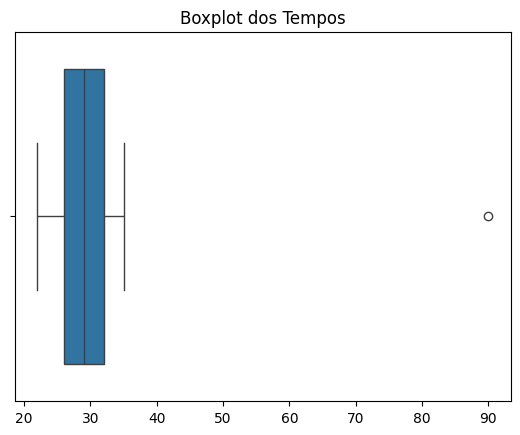

In [ ]:
print("\n--- Questão 2 ---")
tempos = np.array([22, 24, 25, 27, 28, 29, 30, 31, 33, 35, 90])

q1 = np.percentile(tempos, 25)
q3 = np.percentile(tempos, 75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr
outliers = tempos[(tempos < lim_inf) | (tempos > lim_sup)]

print("Mediana:", np.median(tempos))
print("Q1:", q1, "Q3:", q3)
print("Limite inferior:", lim_inf, "Limite superior:", lim_sup)
print("Outliers:", outliers)

sns.boxplot(data=tempos, orient='h')
plt.title("Boxplot dos Tempos")
plt.show()

A mediana é 29, os quartis Q1 e Q3 são 25.5 e 31.5, respectivamente.
O valor 90 está fora dos limites (lim_sup = 43.5), sendo identificado como outlier.
O boxplot mostra isso com um ponto fora da área superior.

________________________________________________________________________________


Questão 3. Um órgão do governo do estado está interessado em determinar padrões sobre o investimento em educação, por habitante, realizado pelas prefeituras. De um levantamento amostral de dez cidades, foram obtidos os valores (codificados) do quadro abaixo:
Cidade       A   B  C D E   F  G H   I  J
Investimento 20 16 14 8 19 15 14 16 19 18
Nesse caso será considerado como investimento básico a média final das observações calculada da
seguinte maneira:
1. Obtém-se uma média inicial;
2. Eliminam-se do conjunto aquelas observações que forem superiores à média inicial mais duas
vezes o desvio padrão, ou inferiores à média inicial menos duas vezes o desvio padrão;
3. Calcula-se a média final como novo conjunto de observações.
Qual o investimento básico que você daria como resposta?

In [ ]:
print("\n--- Questão 3 ---")
dados = np.array([20, 16, 14, 8, 19, 15, 14, 16, 19, 18])
media_inicial = np.mean(dados)
desvio = np.std(dados)

lim_inf = media_inicial - 2 * desvio
lim_sup = media_inicial + 2 * desvio

filtrados = dados[(dados >= lim_inf) & (dados <= lim_sup)]
media_final = np.mean(filtrados)

print("Média inicial:", media_inicial)
print("Desvio padrão:", desvio)
print("Limites:", lim_inf, lim_sup)
print("Dados filtrados:", filtrados)
print("Média final (investimento básico):", media_final)



--- Questão 3 ---
Média inicial: 15.9
Desvio padrão: 3.3301651610693423
Limites: 9.239669677861315 22.560330322138686
Dados filtrados: [20 16 14 19 15 14 16 19 18]
Média final (investimento básico): 16.77777777777778


_______________________________________________________________________________

Questão 4. Um órgão de planejamento governamental está avaliando a distribuição da renda per
capita entre os municípios de um determinado estado, com o objetivo de direcionar políticas públicas
de combate à desigualdade. A equipe de análise produziu o seguinte resumo estatístico com base
nos dados coletados:
• Média: R$ 850,00
• Mediana: R$ 700,00
• Moda: R$ 600,00
• Coeficiente de curtose: 5,2

Com base nessas informações, responda às perguntas abaixo:
a) Interprete a assimetria da distribuição da renda per capita. Que tipo de política pública pode ser
sugerida com base nessa informação?
b) O valor do coeficiente de curtose indica uma distribuição mais ou menos concentrada em torno da
média? O que isso pode representar em termos de variação de renda entre os municípios?
c) Explique, em termos práticos, por que conhecer medidas de formato (assimetria e curtose) é
importante para o desenvolvimento de políticas públicas mais eficazes.

In [ ]:
from IPython.display import Markdown

In [ ]:
# Parte a)
display(Markdown("""
### Questão 4 - Interpretação da distribuição da renda per capita

**a) Assimetria da distribuição:**

A média (R$850) é maior que a mediana (R$700) e a moda (R$600), indicando **assimetria positiva (à direita)**.

Significando que alguns municípios têm renda muito alta, o que eleva a média.

**Política Pública sugerida:** Priorizar políticas públicas para municípios com renda **abaixo da mediana**.
"""))

# Parte b)
display(Markdown("""
**b) Curtose:**

O coeficiente de curtose é **5,2**, maior que o valor de referência **3**, indicando uma distribuição **leptocúrtica**.

- Há maior concentração de valores próximos à média;
- Existem **valores extremos** (municípios muito ricos ou muito pobres).

**Implicação:** Existe **desigualdade significativa**, mesmo que a maioria dos municípios tenha rendas próximas.
"""))

# Parte c)
display(Markdown("""
**c) Importância prática das medidas de forma:**

- A **assimetria** ajuda a identificar a tendência dos dados (se estão concentrados em valores baixos ou altos).
- A **curtose** mostra se os dados estão muito concentrados e se há muitos valores extremos.

*Aplicação prática:* Auxilia na criação de políticas públicas mais justas, direcionando recursos para onde há **maior vulnerabilidade ou exclusão**.
"""))



### Questão 4 - Interpretação da distribuição da renda per capita

**a) Assimetria da distribuição:**

A média (R$850) é maior que a mediana (R$700) e a moda (R$600), indicando **assimetria positiva (à direita)**.

Significando que alguns municípios têm renda muito alta, o que eleva a média.

**Política Pública sugerida:** Priorizar políticas públicas para municípios com renda **abaixo da mediana**.



**b) Curtose:**

O coeficiente de curtose é **5,2**, maior que o valor de referência **3**, indicando uma distribuição **leptocúrtica**.

- Há maior concentração de valores próximos à média;
- Existem **valores extremos** (municípios muito ricos ou muito pobres).

**Implicação:** Existe **desigualdade significativa**, mesmo que a maioria dos municípios tenha rendas próximas.



**c) Importância prática das medidas de forma:**

- A **assimetria** ajuda a identificar a tendência dos dados (se estão concentrados em valores baixos ou altos).
- A **curtose** mostra se os dados estão muito concentrados e se há muitos valores extremos.

*Aplicação prática:* Auxilia na criação de políticas públicas mais justas, direcionando recursos para onde há **maior vulnerabilidade ou exclusão**.
